In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

### Loading Data

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.shape

(700, 2)

In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

#### y colunm having one null value. i am going to drop that null value

In [7]:
data = data.dropna()

In [8]:
data.shape

(699, 2)

# Splitting up the data for test and train our model

In [40]:
#training input and output 
training_input = np.array(data.x[0:500]).reshape(500,1)
training_output = np.array(data.y[0:500]).reshape(500,1)

#testing input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)


In [10]:
np.array(data.x[0:500])

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [11]:
np.array(data.x[0:500]).reshape(500,1)


array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [12]:
# Shape of the training ang testing input and output data

print(f'training input data shape = {training_input.shape}')
print(f'training output data shape = {training_output.shape}')
print(f'testing input data shape = {test_input.shape}')
print(f'testing output data shape = {test_output.shape}')


training input data shape = (500, 1)
training output data shape = (500, 1)
testing input data shape = (199, 1)
testing output data shape = (199, 1)


# <font color = "green">Linear Regration</font>

## Forward propagation

f(x) = m*x + c

At the time of forwar propagation we know our input data and output data. We need to know the parameters.\
So, in the forward propagation function you need to pass input data and parameters

X = input data \
M,C = parameters

In [13]:
def forward_propagation(training_input, parameters):
    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m,training_input) + c

    return predictions

## Cost Function

cost = summation(1/2n * (y - f(x))^2)

in the cost funtion n,y,f(x) is the most important once.\
In the cost function we should pass the prediction and training_output

Y = output data \
f(x) = predictions


In [14]:
def cost_function(predictions, training_output):

    cost = np.mean((training_output - predictions) ** 2) * 0.5

    return cost

## Gradient Descent for Backpropagation

df = summation(f(x) - y) \
dm = df * x \
dc = df * 1

In [15]:
def backward_propagation(training_input, training_output, predictions):

    derivatives = dict()

    df = predictions - training_output
    dm = np.mean(np.multiply(df , training_input))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives["dc"] = dc

    return derivatives

### Update parameters

m = m - (learning_rate * dm) \

c = c - (learning_rate * dc)

In [16]:
def update_parameters(parameters, derivatives, learning_rate):

    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters
    

# Model Training

In [17]:
def train(training_input, training_output, learning_rate, iters):

    #Random parameters

    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss = list()
    
    #iteration
    for i in range(iters):

        #Forward propagation
        predictions = forward_propagation(training_input, parameters)

        #cost
        cost = cost_function(predictions, training_output)

        loss.append(cost)
        print(f'Iteration = {i+1} , Loss = {cost}')

        #plot
        fig, ax = plt.subplots()

        ax.plot(training_input, training_output, '+', label = "Original")
        ax.plot(training_input, predictions, "*", label= "Training")

        legend = ax.legend()


        ax.plot(training_input, training_output, '+', label = "Original")
        ax.plot(training_input, predictions, "*", label= "Training")
        plt.show()
        #backward function
        derivatives = backward_propagation(training_input, training_output, predictions)

        #update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss
    

# Traning

Iteration = 1 , Loss = 14.47924975582893


<Figure size 640x480 with 0 Axes>

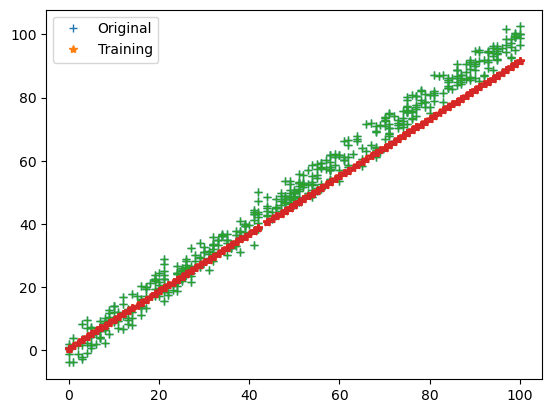

Iteration = 2 , Loss = 8.749111789220898


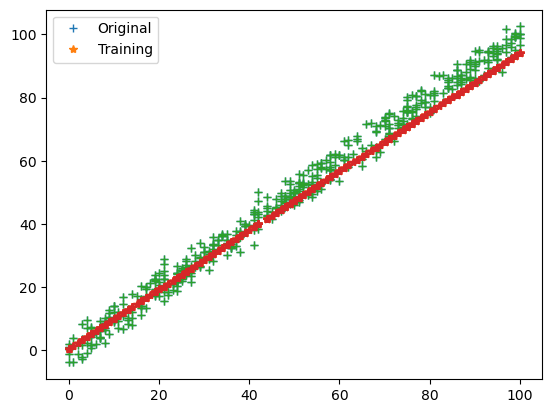

Iteration = 3 , Loss = 6.149339648812682


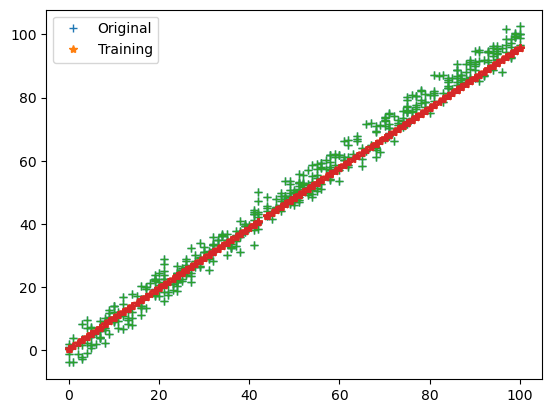

Iteration = 4 , Loss = 4.969817951184256


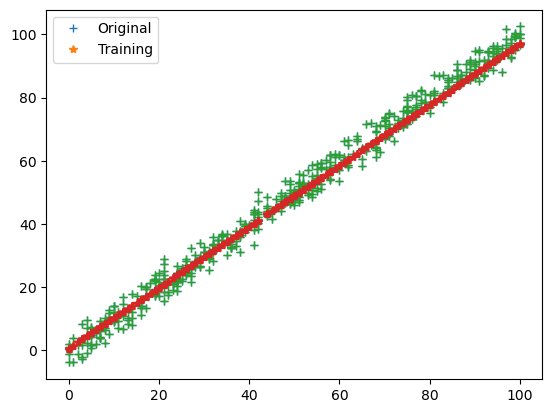

Iteration = 5 , Loss = 4.434665452683665


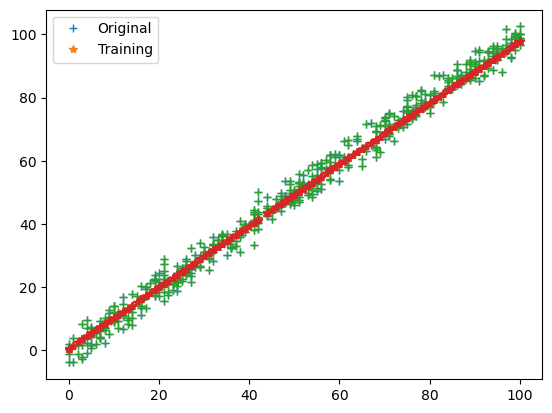

Iteration = 6 , Loss = 4.191863973667954


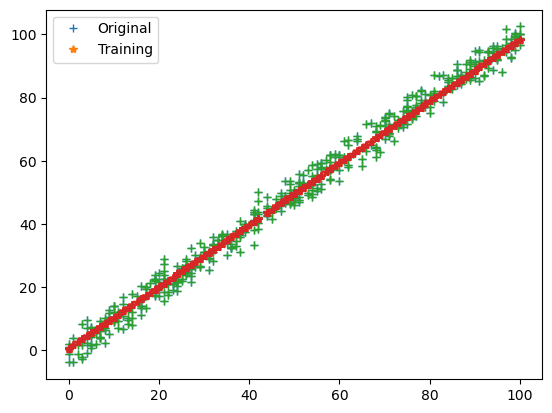

Iteration = 7 , Loss = 4.081702476123285


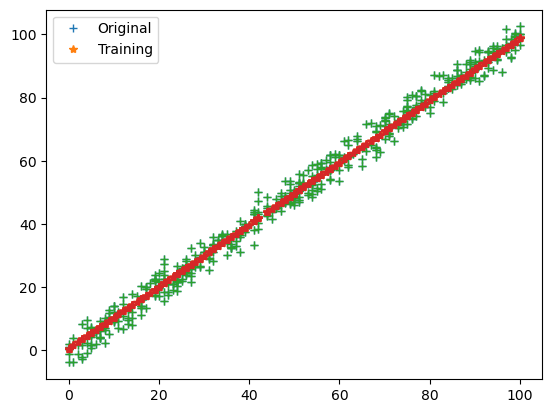

Iteration = 8 , Loss = 4.031719885200231


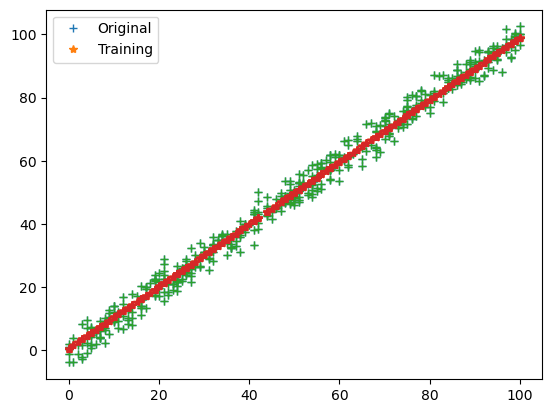

Iteration = 9 , Loss = 4.00904053097874


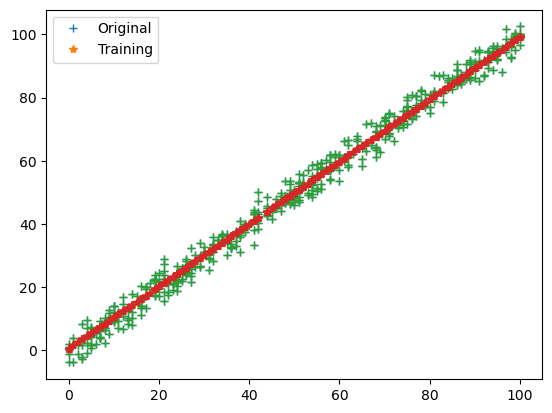

Iteration = 10 , Loss = 3.9987486856016248


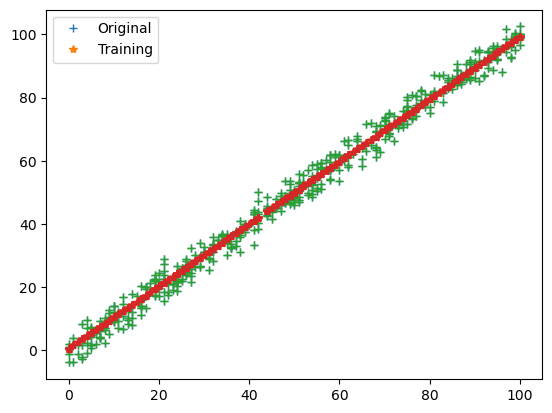

Iteration = 11 , Loss = 3.9940770668188


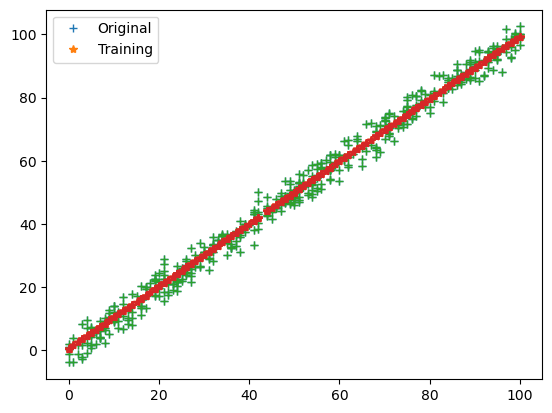

Iteration = 12 , Loss = 3.9919553511776766


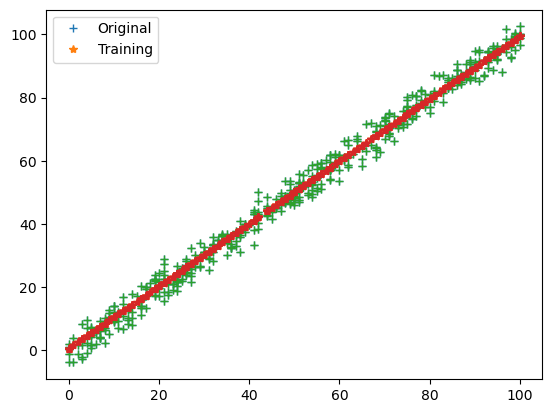

Iteration = 13 , Loss = 3.990990529526994


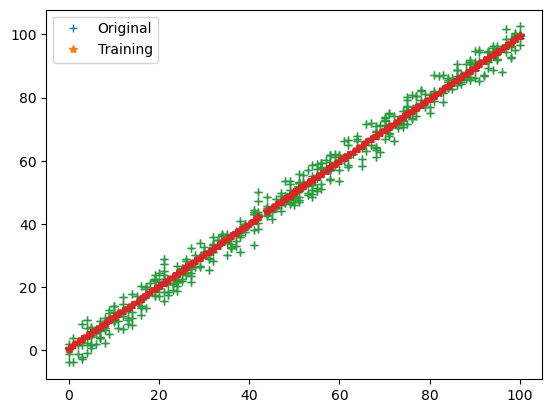

Iteration = 14 , Loss = 3.99055059207186


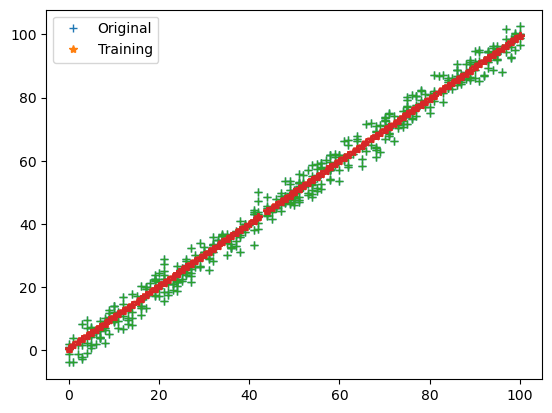

Iteration = 15 , Loss = 3.990348795268294


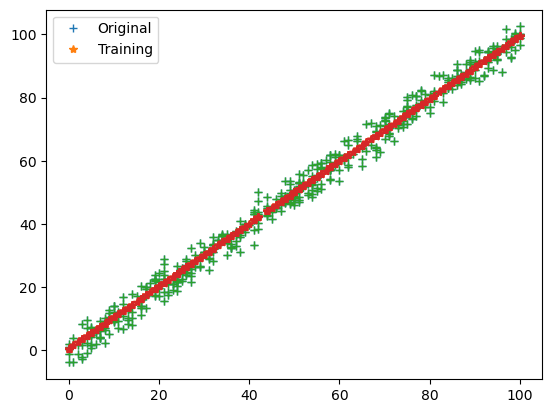

Iteration = 16 , Loss = 3.9902550432527706


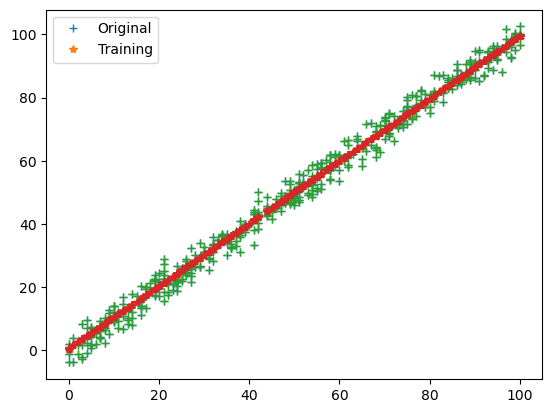

Iteration = 17 , Loss = 3.9902103113879086


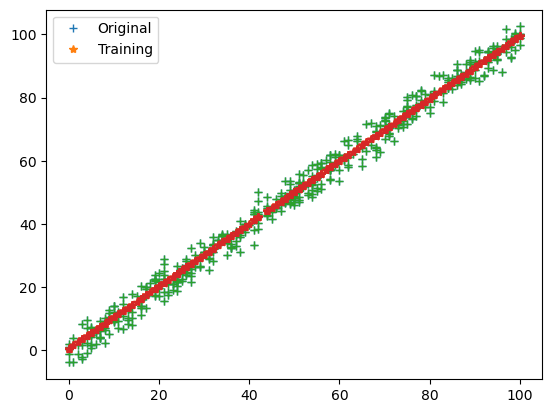

Iteration = 18 , Loss = 3.99018782013034


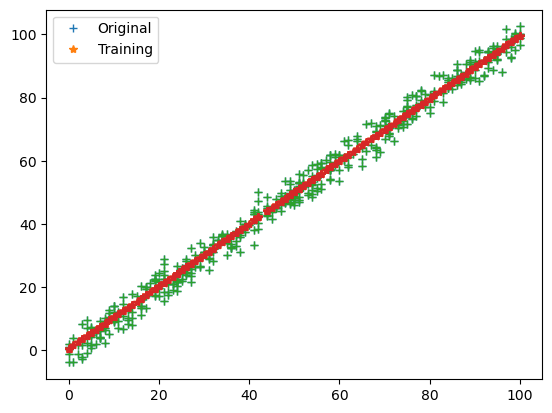

Iteration = 19 , Loss = 3.9901754195715733


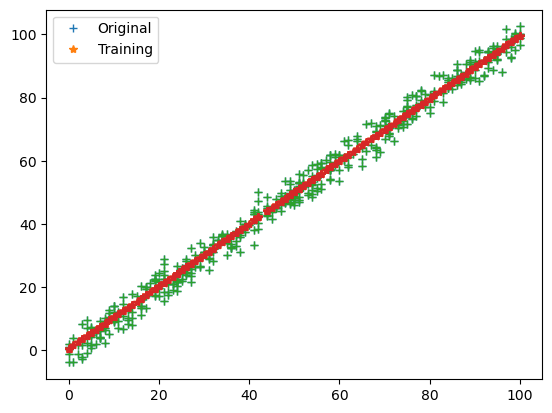

Iteration = 20 , Loss = 3.9901675972846635


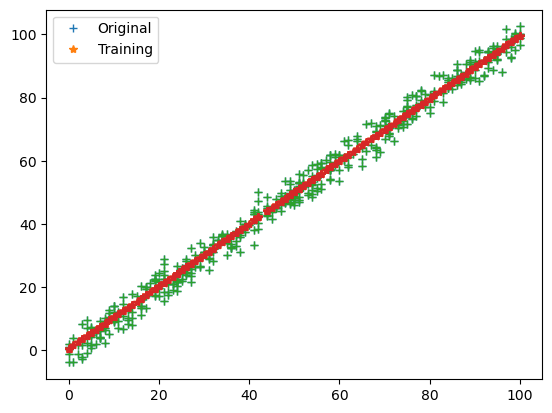

In [18]:
parameters, loss = train(training_input,training_output, 0.0001, 20)

In [19]:
print(parameters)

{'m': 0.9889181674080284, 'c': 0.5599024404591523}


In [20]:
loss

[14.47924975582893,
 8.749111789220898,
 6.149339648812682,
 4.969817951184256,
 4.434665452683665,
 4.191863973667954,
 4.081702476123285,
 4.031719885200231,
 4.00904053097874,
 3.9987486856016248,
 3.9940770668188,
 3.9919553511776766,
 3.990990529526994,
 3.99055059207186,
 3.990348795268294,
 3.9902550432527706,
 3.9902103113879086,
 3.99018782013034,
 3.9901754195715733,
 3.9901675972846635]

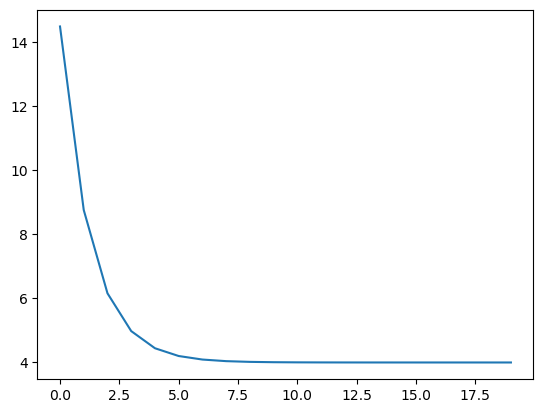

In [21]:
plt.plot(loss)

# Let's predict

In [22]:
test_prediction = test_input * parameters['m'] + parameters['c']

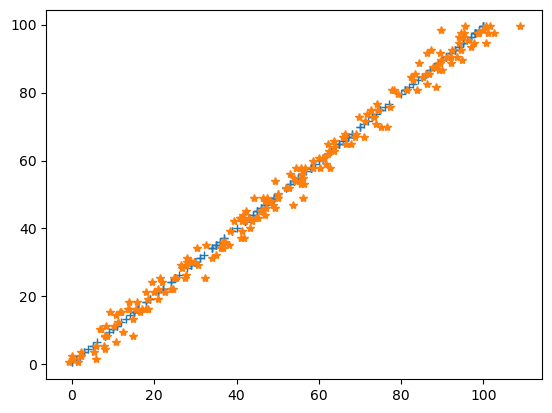

In [23]:
plt.plot(test_input, test_prediction, '+')
plt.plot(test_output, test_prediction, '*')
plt.show()

# cost of prediction

In [24]:
cost_function(test_output, test_prediction)

4.006307285742189

# Linear Regression using Sk-learn

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(training_input, training_output)

LinearRegression()

In [31]:
lr_model.coef_

array([[1.0009993]])

In [32]:
lr_model.intercept_

array([-0.23603461])

# Prediction

In [33]:
test_predictions = lr_model.predict(test_input)

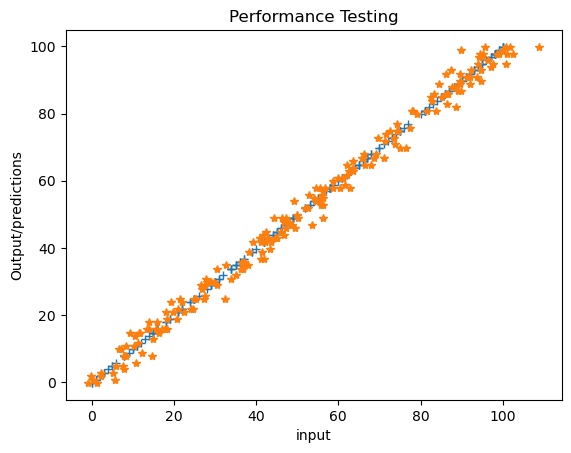

In [35]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_output, test_predictions, '*')
plt.xlabel('input')
plt.ylabel('Output/predictions')
plt.title('Performance Testing')
plt.show()

# Cost

In [37]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, test_predictions)
cost

8.030031591835375